In [209]:
from preproccessing import loadStooqData
import numpy as np
import statsmodels.api as sm
import pyesg
import seaborn as sns
import matplotlib.pyplot as plt

In [360]:
data = loadStooqData('cpiypl.m','1993-01-01')

In [361]:
cpi = data[:'2022-12-31'] / 100
cpi = np.log(cpi+1)
cpi_p = cpi.shift(1).dropna()
cpi = cpi.iloc[1:]
cpi = cpi.reset_index()
cpi_p = cpi_p.reset_index()

In [362]:
cpi.describe()

,Zamkniecie
count,359.000000
mean,0.067529
std,0.082810
min,-0.016129
25%,0.015873
50%,0.034401
75%,0.091666
max,0.334327


In [363]:
cpi_p = sm.add_constant(cpi_p,prepend=False)

In [364]:
model = sm.OLS(cpi['Zamkniecie'],cpi_p[['Zamkniecie','const']])

In [365]:
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Zamkniecie   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 5.557e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:09:10   Log-Likelihood:                 1292.6
No. Observations:                 359   AIC:                            -2581.
Df Residuals:                     357   BIC:                            -2574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Zamkniecie     0.9857      0.004    235.732      0.000       0.978       0.994
const          0.0005      0.000      1.134      0.257      -0.000       0.001
==============================================================================
Omnibus:                       71.111   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.428
Skew:                           0.453   Prob(JB):                    2.69e-156
Kurtosis:                       9.861   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
b = res.params['Zamkniecie']
a = res.params['const']
k = (1 -b)/(1/12)
u = a/k
print('mu: ',u)
print('k: ', k)

mu:  0.0029843626309032714
k:  0.17128022253072883


In [367]:
resid = res.resid
sig = np.sqrt(np.mean(resid**2))
sig = np.round(sig,4)
sig

0.0066

In [368]:
simulator = pyesg.OrnsteinUhlenbeckProcess(mu=u,sigma=sig,theta=k)

In [369]:
length = 120
scenarios = simulator.scenarios(0.1,1,1000,length)

In [370]:
perc = np.percentile(scenarios,[5,25,50,75,95],axis=0)

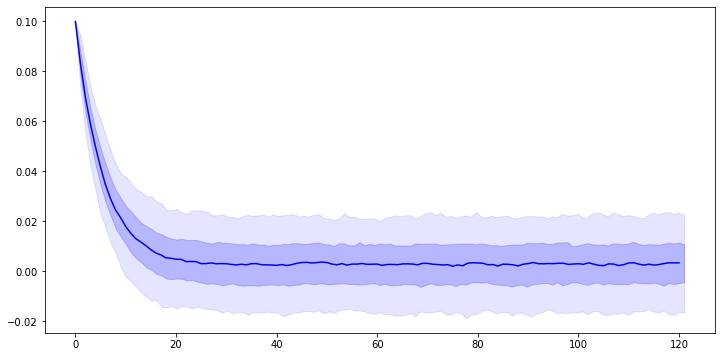

In [375]:
x = np.linspace(0,length+1,length+1)
fig,ax = plt.subplots(figsize=(12,6))
ax.fill_between(x=x,y1=perc[0],y2=perc[4], color='blue', alpha=0.1)
ax.fill_between(x=x,y1=perc[1],y2=perc[3], color='blue', alpha=0.2)
ax.plot(perc[2],color='blue')

In [376]:
print(perc[:,12])
print(perc[:,24])
print(perc[:,36])
print(perc[:,60])
print(perc[:,120])


[-0.00625271  0.00520108  0.01311847  0.0215405   0.03273097]
[-0.01410237 -0.00403243  0.00388891  0.01253135  0.0244475 ]
[-0.01641843 -0.00575125  0.00311915  0.01074849  0.0223881 ]
[-0.01633959 -0.00546724  0.00292982  0.01124847  0.02006389]
[-0.01657084 -0.00437114  0.00343886  0.01089229  0.02273733]
